In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

Sentences   Labels
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [5]:
data.Labels.value_counts()

joy         6066
sadness     5216
anger       4727
fear        4240
love        3597
surprise    2754
Name: Labels, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentences  26600 non-null  object
 1   Labels     26600 non-null  object
dtypes: object(2)
memory usage: 415.8+ KB


In [7]:
data.isna().sum()

Sentences    0
Labels       0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

<AxesSubplot:>

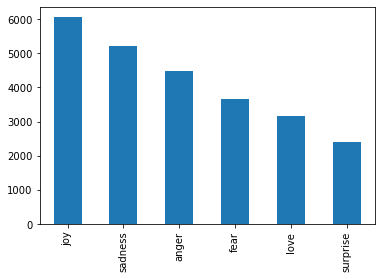

In [9]:
data.Labels.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Labels', ylabel='count'>

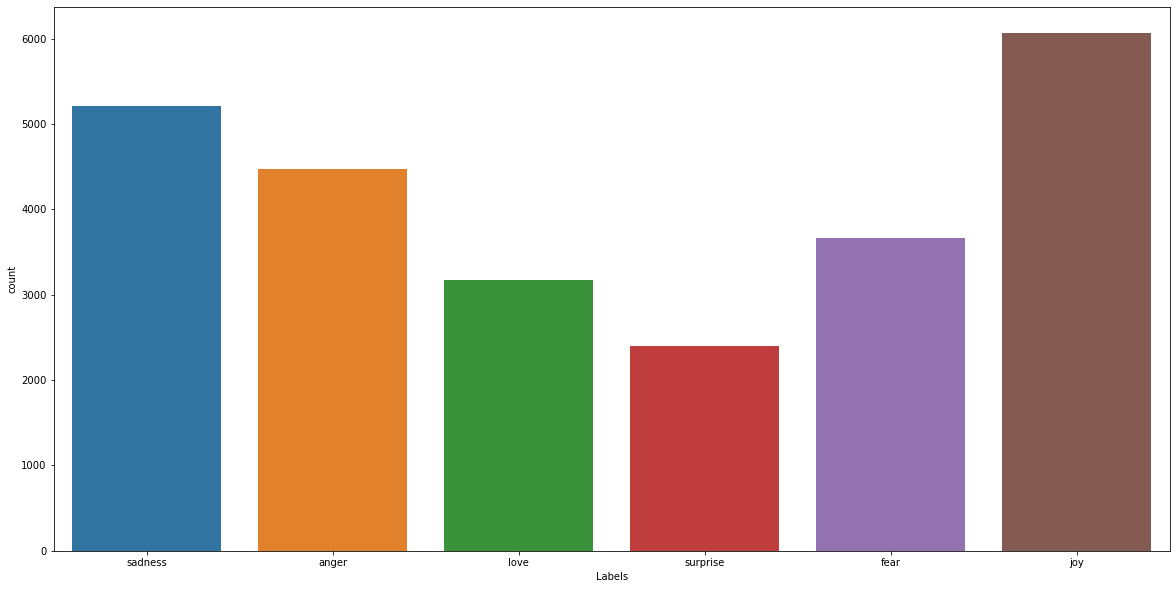

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x = data['Labels'])

In [11]:
import string 
result = string.punctuation
print(result)
punctuation_list = [i for i in result]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
for i in data.Sentences:
    for j in i: 
        if j in result:
            print(i)

Ironic. He could save others from secrecy-enabled corruption, but not himself.
Ironic. He could save others from secrecy-enabled corruption, but not himself.
Ironic. He could save others from secrecy-enabled corruption, but not himself.
Ironic. He could save others from secrecy-enabled corruption, but not himself.
shockingly close to reality.
Omg lala a housewife I can’t even imagine!
People who hate [NAME] really really hate him. It’s quite fascinating.
People who hate [NAME] really really hate him. It’s quite fascinating.
People who hate [NAME] really really hate him. It’s quite fascinating.
People who hate [NAME] really really hate him. It’s quite fascinating.
And only $300+ a night, beautiful but expensive.
And only $300+ a night, beautiful but expensive.
And only $300+ a night, beautiful but expensive.
And only $300+ a night, beautiful but expensive.
Yeah, and there's no better way to make a market more competitive than to regulate it more...
Yeah, and there's no better way to mak

Id buy those shoes and walk in the dirtiest places just to piss [NAME] off.
Self-deprecating humor is mainstream now. A lot of hot people now have hobbies and personality traits that were once almost synonymous with dumpy/nerdy/ugly people.
Self-deprecating humor is mainstream now. A lot of hot people now have hobbies and personality traits that were once almost synonymous with dumpy/nerdy/ugly people.
Self-deprecating humor is mainstream now. A lot of hot people now have hobbies and personality traits that were once almost synonymous with dumpy/nerdy/ugly people.
Self-deprecating humor is mainstream now. A lot of hot people now have hobbies and personality traits that were once almost synonymous with dumpy/nerdy/ugly people.
Self-deprecating humor is mainstream now. A lot of hot people now have hobbies and personality traits that were once almost synonymous with dumpy/nerdy/ugly people.
Cus the left doesn't give a shit about people who fought for the USA!
Cus the left doesn't give a s

[NAME], don't fucking front the pass if your help defender is [NAME] he will not help you
No one loves you. Cry more.
No one loves you. Cry more.
Nope...this master criminal knewe!
Nope...this master criminal knewe!
Nope...this master criminal knewe!
Nope...this master criminal knewe!
Your passion for [NAME] literally put a big smile on my face. Stay wavy!
Your passion for [NAME] literally put a big smile on my face. Stay wavy!
Your passion for [NAME] literally put a big smile on my face. Stay wavy!
Your passion for [NAME] literally put a big smile on my face. Stay wavy!
Now THAT is a murder by words!
See the other one has advertising that hides the fucking stupid [NAME] that's the difference!
See the other one has advertising that hides the fucking stupid [NAME] that's the difference!
See the other one has advertising that hides the fucking stupid [NAME] that's the difference!
See the other one has advertising that hides the fucking stupid [NAME] that's the difference!
Kotaku never ce

He gets paid to hate them... what's hard to understand?
He gets paid to hate them... what's hard to understand?
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
lol not bullying. Just a socially aware nerd complaining about how annoying most of my people are. ¯_(ツ)_/¯
You’re a women hating racist. That’s what you are. Stop talking shite and trying to pretend otherwise
You’re a women hating racist. 

I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the same way about [NAME] and [NAME]. 
I hated [NAME], but only because I thought he was good and played for the Cowboys. I feel the sam

Just like that fucking idiot that was just trying to kidnap that woman, and chased her into a Karate studio... turned out just about the same.
>big dumb rodeo Them's fightin' words
>big dumb rodeo Them's fightin' words
>big dumb rodeo Them's fightin' words
I need to amend: Fuck the Patriots and fuck [NAME] in particular.
I need to amend: Fuck the Patriots and fuck [NAME] in particular.
I need to amend: Fuck the Patriots and fuck [NAME] in particular.
I need to amend: Fuck the Patriots and fuck [NAME] in particular.
You and me both 8 years wasted on an ssshole narc I don't know any good advice really just wanted to offer my support stay strong.
You and me both 8 years wasted on an ssshole narc I don't know any good advice really just wanted to offer my support stay strong.
Let's do this shit. Michigan first half?
Let's do this shit. Michigan first half?
Let's do this shit. Michigan first half?
> The headline writers are misrepresenting her words (second publication I have seen in minute

Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
Man, [NAME] is having a heck of a career! In the end, he'll be repping us<3
>the women's march chairs are so left wing they took a picture with LF.
>the women's march chairs are so left wing they took a picture with LF.
>the women's march chairs are so left wing they took a picture with LF.
...what? You're far more concerned with the o line than signing [NAME].
...what? You're far more concerned with the o line than signing [NAME].
...what? You're far more concerned with the o line than signing [NAME].
...what? You're far more concerned w

Mommy bad man!!!
Mommy bad man!!!
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):):):)
Oh, did they innovate anything I would recognize with their obscenely large financial investments? :):

Forgot to mention that it contains lanolin, don't know if thats a deal breaker. Regardless, alcohol free emollient + occlusive is the way to go
Forgot to mention that it contains lanolin, don't know if thats a deal breaker. Regardless, alcohol free emollient + occlusive is the way to go
Forgot to mention that it contains lanolin, don't know if thats a deal breaker. Regardless, alcohol free emollient + occlusive is the way to go
Forgot to mention that it contains lanolin, don't know if thats a deal breaker. Regardless, alcohol free emollient + occlusive is the way to go
Forgot to mention that it contains lanolin, don't know if thats a deal breaker. Regardless, alcohol free emollient + occlusive is the way to go
Oh wow, [NAME], owchie [NAME], [NAME] to pick one
Oh wow, [NAME], owchie [NAME], [NAME] to pick one
Oh wow, [NAME], owchie [NAME], [NAME] to pick one
Oh wow, [NAME], owchie [NAME], [NAME] to pick one
Oh wow, [NAME], owchie [NAME], [NAME] to pick one
Oh wow, [NAME], owchie [NAME],

Son: I can't believe you were in i-wreck
wow, here in Brazil people say the opposite of this phrase, also makes me mad
wow, here in Brazil people say the opposite of this phrase, also makes me mad
I feel like I went out to get the pizzas and I came back to my apartment on fire.
yep, I witnessed a broken blood vessel in the eye from stifling a sneeze
I wonder how it's still tagged questionable...
I wonder how it's still tagged questionable...
I wonder how it's still tagged questionable...
I wonder how it's still tagged questionable...
That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.
That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.
That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.
That's crazy; I went to a super [RELIGION] high school and I thi

Im just glad it didn't take any of that for us. I'm glad I didn't have to see a [NAME] screaming match
Im just glad it didn't take any of that for us. I'm glad I didn't have to see a [NAME] screaming match
Im just glad it didn't take any of that for us. I'm glad I didn't have to see a [NAME] screaming match
Im just glad it didn't take any of that for us. I'm glad I didn't have to see a [NAME] screaming match
wow even the buildings on the poster haven't loaded in
How did this not get marked as meta? Tried posting something similar here and it was instantly flagged as “meta commentary about the sub” and blocked.
How did this not get marked as meta? Tried posting something similar here and it was instantly flagged as “meta commentary about the sub” and blocked.
Oh neat! I didn't realize you guys shot it. I figured the company had set up a tripod. In that case I retract my complaint.
Oh neat! I didn't realize you guys shot it. I figured the company had set up a tripod. In that case I retra

Megagrindr, and I love it.
No the bubble is love. The bubble is life. With the bubble comes zero expectations and a sweet sixteen appearance. Such is life in South Canada.
No the bubble is love. The bubble is life. With the bubble comes zero expectations and a sweet sixteen appearance. Such is life in South Canada.
No the bubble is love. The bubble is life. With the bubble comes zero expectations and a sweet sixteen appearance. Such is life in South Canada.
No the bubble is love. The bubble is life. With the bubble comes zero expectations and a sweet sixteen appearance. Such is life in South Canada.
The whole thing is poetry. That finish is magic. Nose to the mit. Love this !
The whole thing is poetry. That finish is magic. Nose to the mit. Love this !
The whole thing is poetry. That finish is magic. Nose to the mit. Love this !
The whole thing is poetry. That finish is magic. Nose to the mit. Love this !
Relove. No, it’s all fair pricing, the collection is enormous.
Relove. No, it’s a

One of my favorite porn sites ever. If you're looking for good incest porn, it's the place to go.
One of my favorite porn sites ever. If you're looking for good incest porn, it's the place to go.
The "richest" country in the worlds royal palace banquet hall filled with cheap mass produced junk food and they love it.
The "richest" country in the worlds royal palace banquet hall filled with cheap mass produced junk food and they love it.
The "richest" country in the worlds royal palace banquet hall filled with cheap mass produced junk food and they love it.
Glad he's still balling, better than [NAME] for sure. I would have liked to have kept him just cos I liked how hard he played. 
Glad he's still balling, better than [NAME] for sure. I would have liked to have kept him just cos I liked how hard he played. 
Glad he's still balling, better than [NAME] for sure. I would have liked to have kept him just cos I liked how hard he played. 
Glad he's still balling, better than [NAME] for sure. 

I'd love to have [NAME] on our team....
I'd love to have [NAME] on our team....
I'd love to have [NAME] on our team....
I'd love to have [NAME] on our team....
I'd love to have [NAME] on our team....
Love you, [NAME]
Love you, [NAME]
Love you, [NAME]
I’d love that luxury of time.
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
How could I not? These actors...I love them. Their faces give me joy, hope. 
Some of the problems I noticed afterwards, I love the car. The experience not so much. 
Some of the problems I noticed afterwards, I love the car. The experience not so much. 
Some

[NAME] is my top choice. Love the tape and could anchor the line for many years
[NAME] is my top choice. Love the tape and could anchor the line for many years
[NAME] is my top choice. Love the tape and could anchor the line for many years
It really is. I didn't know a thing about the feud and it caught me off guard how brutal it was. Enjoyed it a lot though.
It really is. I didn't know a thing about the feud and it caught me off guard how brutal it was. Enjoyed it a lot though.
It really is. I didn't know a thing about the feud and it caught me off guard how brutal it was. Enjoyed it a lot though.
It really is. I didn't know a thing about the feud and it caught me off guard how brutal it was. Enjoyed it a lot though.
you would love the episode of the boondocks called the return of the king.
Love him.
This is all soooo nice. What nice people.
This is all soooo nice. What nice people.
Cause I love [NAME] over him 😂
Cause I love [NAME] over him 😂
I also love that her correction was wrong

Don’t worry, he’s more afraid of you than you are of him. Just act tough, it’ll work...maybe...
Don’t worry, he’s more afraid of you than you are of him. Just act tough, it’ll work...maybe...
Don’t worry, he’s more afraid of you than you are of him. Just act tough, it’ll work...maybe...
He has been ghosting me whenever I text or call him. I know he has been getting them though. As they are always left on read.
He has been ghosting me whenever I text or call him. I know he has been getting them though. As they are always left on read.
He has been ghosting me whenever I text or call him. I know he has been getting them though. As they are always left on read.
Damn! You were so close! Scary. Damn damn!
Damn! You were so close! Scary. Damn damn!
Damn! You were so close! Scary. Damn damn!
Damn! You were so close! Scary. Damn damn!
Yeah some kid in a BMW ran me off the road. I didnt just crash had some help.
Yeah some kid in a BMW ran me off the road. I didnt just crash had some help.
How sc

Welcome to the future, kid. Unfortunately your mom isn't coming.
Welcome to the future, kid. Unfortunately your mom isn't coming.
Welcome to the future, kid. Unfortunately your mom isn't coming.
Those things still haunt my dreams to this day.
This is truly terrifying.
Scary. I bet youre fun at parties.
Scary. I bet youre fun at parties.
Those mindsets are extremely dangerous to our democracy.
I have listened to him and that's how I know he's a terrible person and his goal is to turn impressionable people into terrible people like himself.
I have listened to him and that's how I know he's a terrible person and his goal is to turn impressionable people into terrible people like himself.
I have listened to him and that's how I know he's a terrible person and his goal is to turn impressionable people into terrible people like himself.
One of my worst nightmares. Ugh.
One of my worst nightmares. Ugh.
Get it out of the way as quickly as possible. Some people claim to like it, so maybe you'll

Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Oh dear lord. Imagine if [NAME] scores off the break from a scoring chance of [NAME] and [NAME]
Take this down my dude. This is cruel.
Take this down my dude. This is cruel.
You guys are horrible. I love it.
You guys are horrible. I love it.
Im always worrying about the same thing, thats why Im always posting and within hours freaking out and deleting my posts 
Yeah, you get worried sick, imagine them hey slaughtered by Coyotes AND realize it’s all your fault.
Yeah, you get worried sick, imagine them hey slaughtere

In [13]:
text_list = []
for i in data.Sentences:
    lower_text = i.lower()
    empty_string=" "
    new_string=re.sub(r'[^A-Za-z]',empty_string,lower_text)
    space_remove_string = re.sub(' +', empty_string, new_string)
    space_remove_string = space_remove_string.strip()
    text_list.append(space_remove_string)
len(text_list)

24992

In [14]:
for i in text_list:
    for j in i: 
        if j in result:
            print(i)

In [15]:
data['clean_data'] = text_list

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24992 entries, 0 to 24991
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentences   24992 non-null  object
 1   Labels      24992 non-null  object
 2   clean_data  24992 non-null  object
dtypes: object(3)
memory usage: 585.9+ KB


In [17]:
data

Sentences   Labels  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
24987  im having ssa examination tomorrow in the morn...  sadness   
24988  i constantly worry about their fight against n...      joy   
24989  i feel its important to share this info for th...      joy   
24990  i truly feel that if you are passionate enough...      joy   
24991  i feel like i just wanna buy any cute make up ...      joy   

                                              clean_data  
0                                i didnt feel humiliated  
1      i can go from feeling so hopeless to so damned...  
2       im grabbing a minute to post i feel greedy wrong  
3      i am ever feeling nostalgic about the fireplac...  
4                                   i am feeling grouchy  
...                                                  ...  
24987  im having ssa examination tomorrow in the morn...  
24988  i constantly worry about their fight against n...  
24989  i feel its important to share this info for th...  
24990  i truly feel that if you are passionate enough...  
24991  i feel like i just wanna buy any cute make up ...  

[24992 rows x 3 columns]

In [18]:
for i in text_list:
    for j in i: 
        if j in result:
            print(i)

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english')) 
def remove_stop(text):
    word_tokens = word_tokenize(text) 

    filtered_sentence = []

    for w in range(len(word_tokens)): 
        if word_tokens[w] not in stop_words: 
            filtered_sentence.append(word_tokens[w])

    lemmatize_words = []
    lemmatizer = WordNetLemmatizer()
    for w in filtered_sentence:
        rootWord = lemmatizer.lemmatize(w)
        lemmatize_words.append(rootWord)
    return lemmatize_words

In [21]:
data['clean_data'] = data['clean_data'].apply(remove_stop)

In [22]:
data.head()

Sentences   Labels  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                          clean_data  
0                          [didnt, feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2  [im, grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]

In [23]:
def join_back(list_input):
    return " ".join(list_input)

In [24]:
data['clean_data'] = data['clean_data'].apply(join_back)

In [25]:
data.head()

Sentences   Labels  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                          clean_data  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy

In [27]:
from collections import Counter

In [28]:
def extract_keywords(text,num=20):
    tokens = [token for token in text.split()]
    most_common = Counter(tokens).most_common(num)
    return dict(most_common)

In [30]:
emotion_list = data['Labels'].unique().tolist()
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [32]:
dit ={}
for i in emotion_list:
    l = []
    for j in data[data['Labels']== i]['clean_data']:
        l.append(j)
    dox = ' '.join(l)
    dit[i] = dox
    
dit2 = {}
for i in dit.keys():
    dit2[i] = extract_keywords(dit[i])

    
df1 = pd.DataFrame(dit2)
        
df1  

sadness   anger    love  surprise    fear     joy
feel        3750.0  1710.0  1133.0     459.0  1430.0  4553.0
feeling     1831.0   872.0   502.0     255.0   871.0  1864.0
like         944.0   575.0   676.0     222.0   380.0  1130.0
im           772.0   393.0   235.0     117.0   357.0   909.0
know         316.0   197.0   139.0     113.0   162.0   290.0
really       314.0   202.0   173.0     118.0   171.0   340.0
time         303.0   212.0   128.0     107.0   181.0   371.0
get          254.0   272.0   121.0      81.0   160.0   302.0
day          252.0     NaN     NaN       NaN     NaN   272.0
thing        245.0   171.0     NaN       NaN   162.0   224.0
ive          236.0     NaN     NaN       NaN     NaN     NaN
would        228.0   160.0   162.0      92.0   159.0   233.0
little       222.0   136.0     NaN       NaN   182.0     NaN
want         221.0   175.0    98.0       NaN     NaN   245.0
make         218.0   158.0    98.0       NaN   156.0   355.0
still        216.0     NaN     NaN      96.0   139.0     NaN
life         206.0     NaN    97.0       NaN     NaN   231.0
even         205.0   146.0     NaN      82.0     NaN     NaN
people       200.0   277.0   124.0      96.0   167.0   238.0
think        197.0     NaN     NaN       NaN   131.0   220.0
name           NaN   359.0   480.0     398.0   250.0     NaN
fuck           NaN   208.0     NaN       NaN     NaN     NaN
hate           NaN   179.0     NaN       NaN     NaN     NaN
one            NaN   174.0   175.0     113.0   154.0   236.0
fucking        NaN   145.0     NaN       NaN     NaN     NaN
love           NaN     NaN  1195.0       NaN     NaN   224.0
loved          NaN     NaN   122.0       NaN     NaN     NaN
much           NaN     NaN   106.0       NaN     NaN     NaN
sweet          NaN     NaN    98.0       NaN     NaN     NaN
loving         NaN     NaN    93.0       NaN     NaN     NaN
surprised      NaN     NaN     NaN     198.0     NaN     NaN
wow            NaN     NaN     NaN     178.0     NaN     NaN
oh             NaN     NaN     NaN     156.0     NaN     NaN
wonder         NaN     NaN     NaN      88.0     NaN     NaN
shocked        NaN     NaN     NaN      87.0     NaN     NaN
amazed         NaN     NaN     NaN      85.0     NaN     NaN
scared         NaN     NaN     NaN       NaN   166.0     NaN
afraid         NaN     NaN     NaN       NaN   160.0     NaN
bit            NaN     NaN     NaN       NaN   140.0     NaN
good           NaN     NaN     NaN       NaN     NaN   228.0
something      NaN     NaN     NaN       NaN     NaN   221.0

In [33]:
def plot_most_common(mydict,emotion):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title('Plot of {} Most Common 20 key words'.format(emotion))
    sns.barplot(x='token',y='count',data=df_01)
    plt.show()

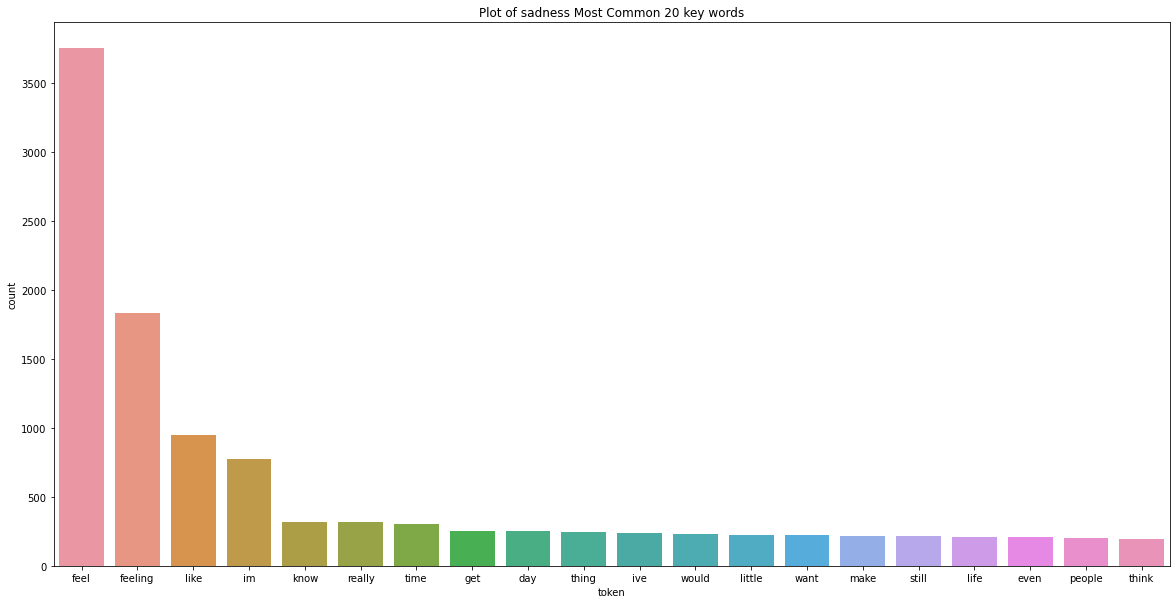

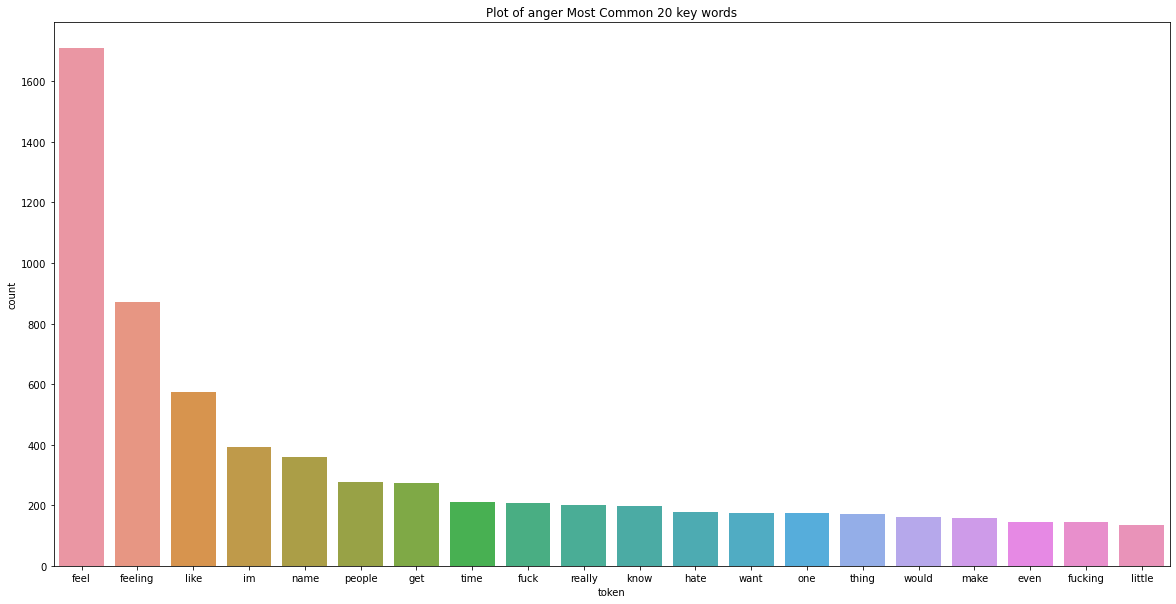

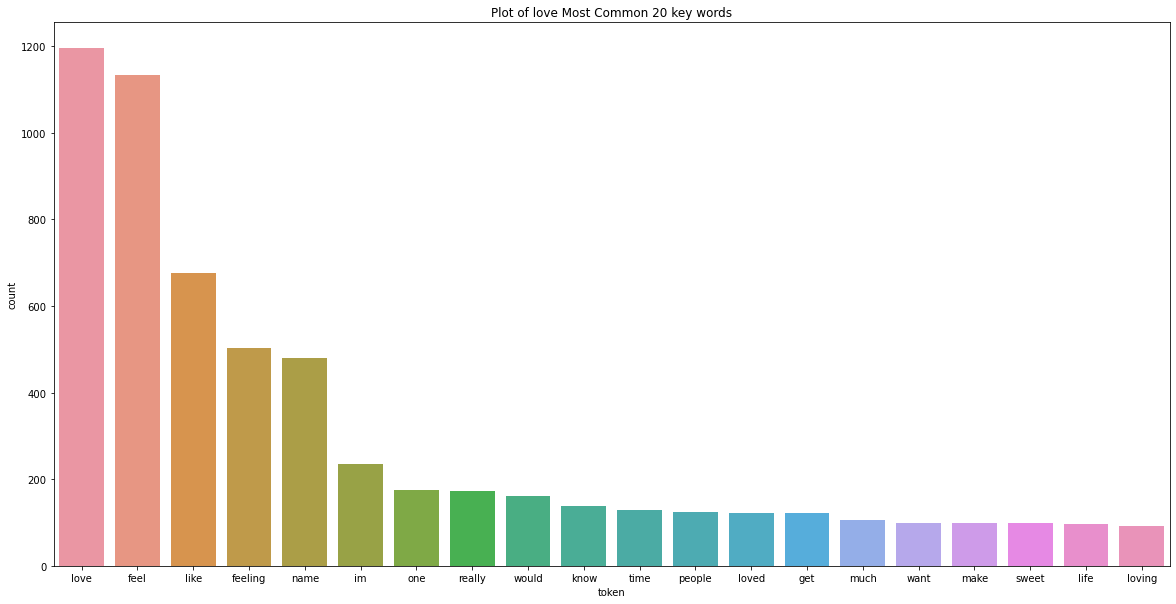

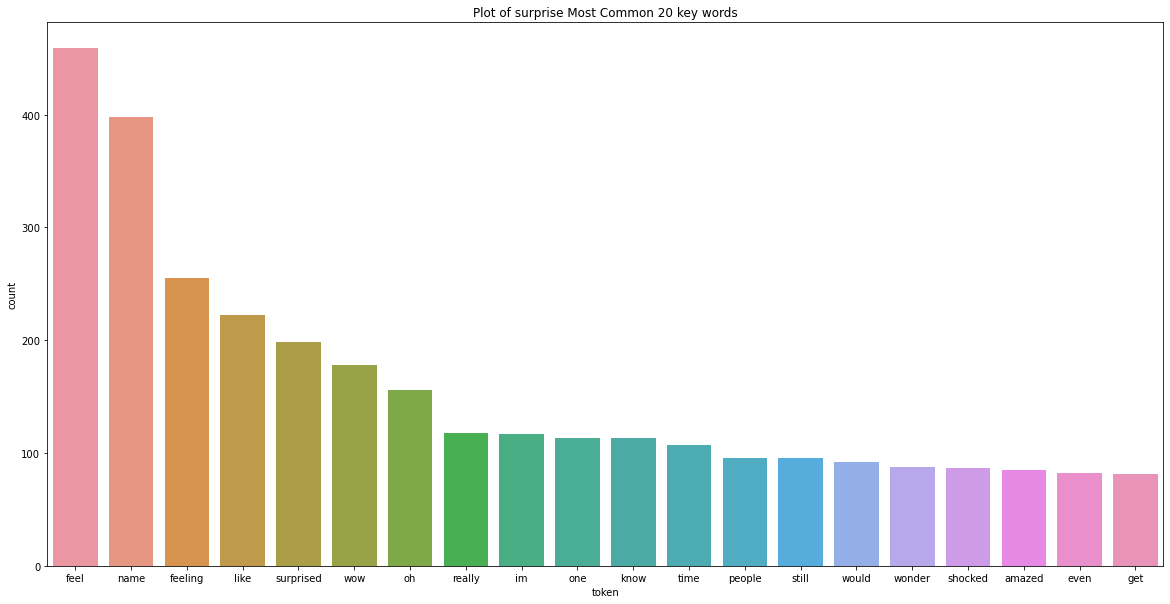

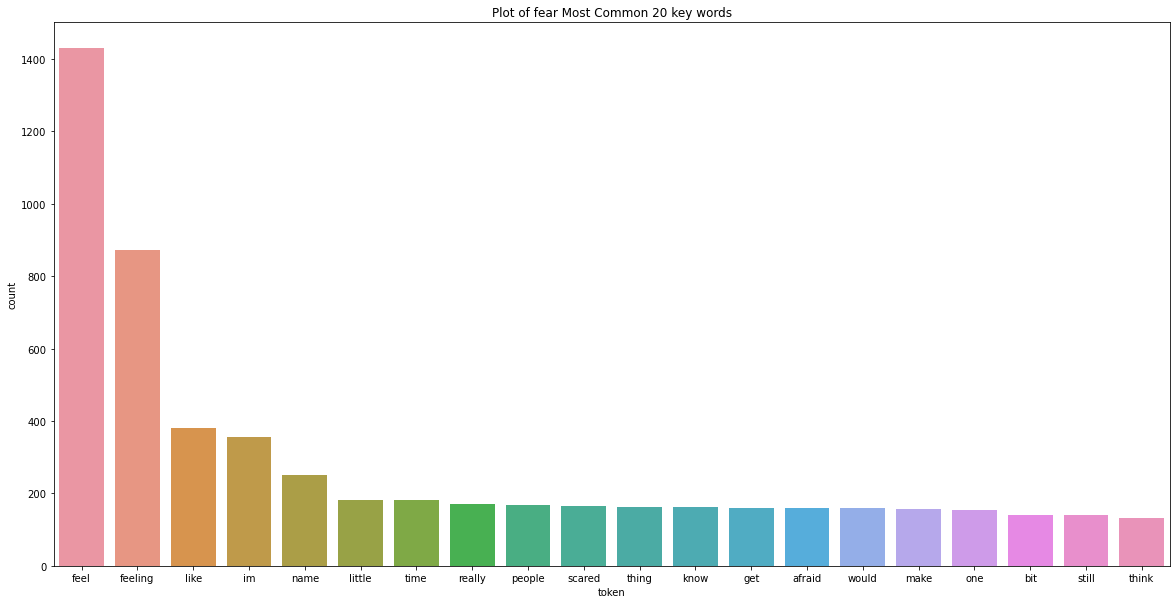

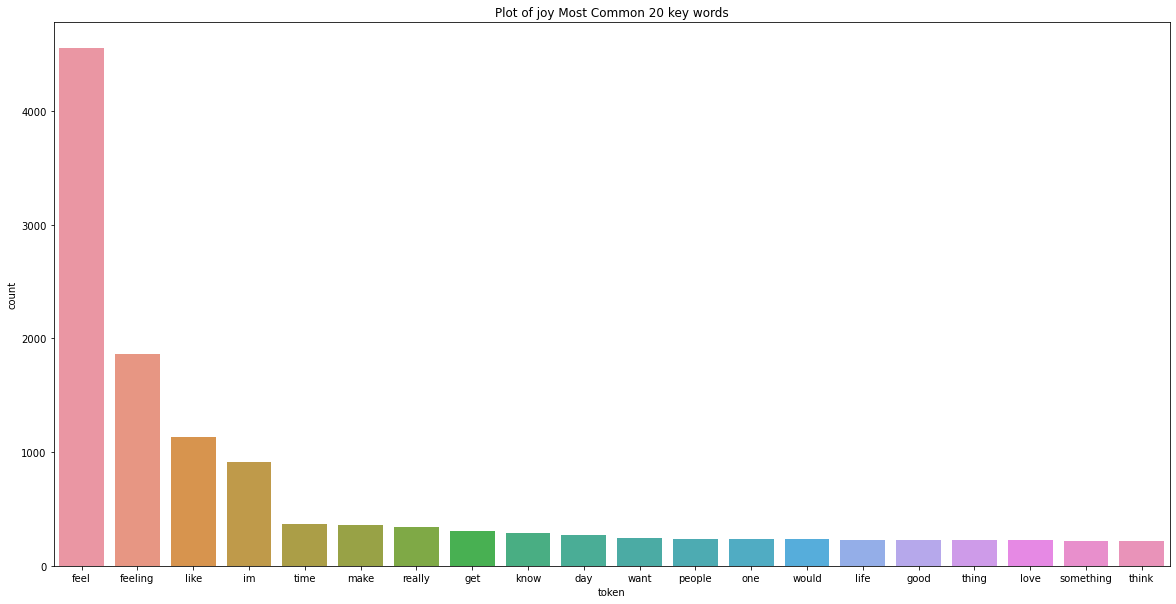

In [34]:
for i in dit2.keys():
    plot_most_common(dit2[i],i)
    

In [35]:
from wordcloud import WordCloud

In [36]:
def plot_wordcloud(docx,emotion):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.title('Word plot of {}'.format(emotion))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.show()

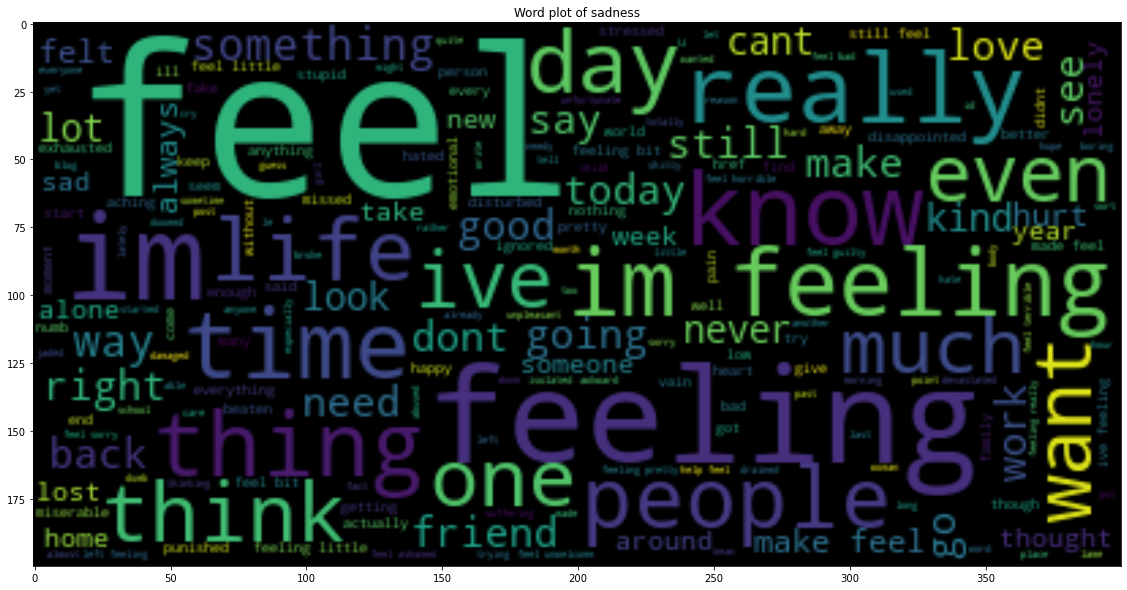

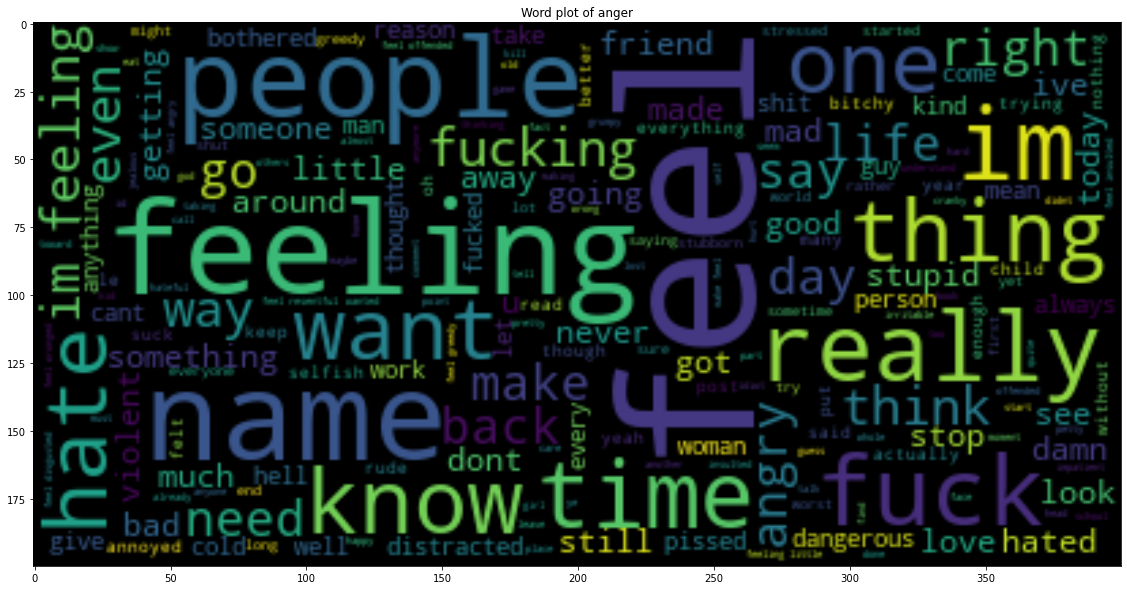

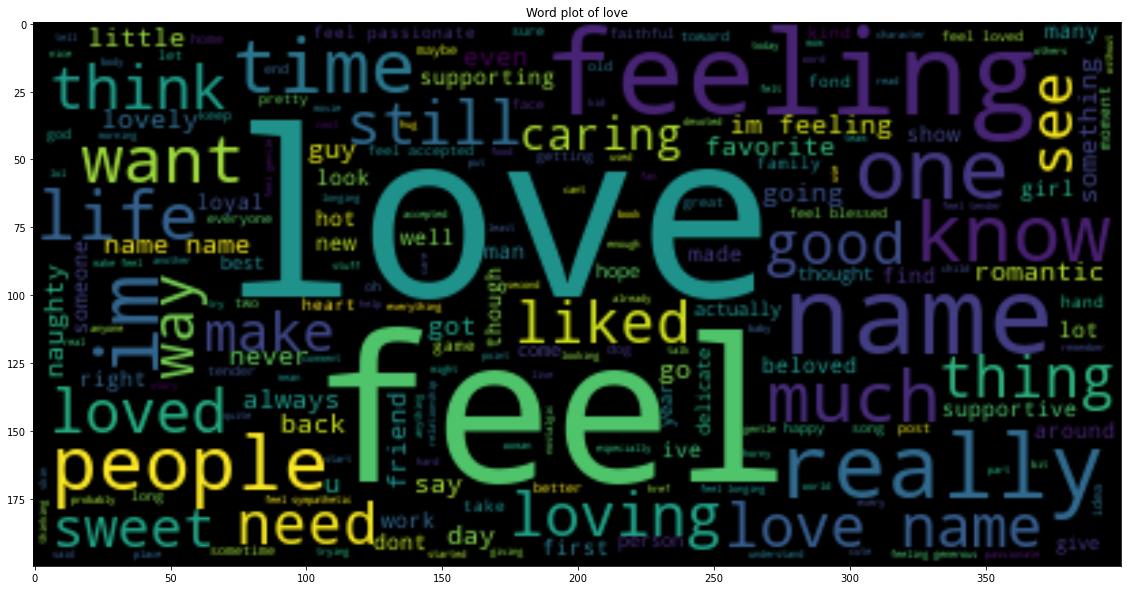

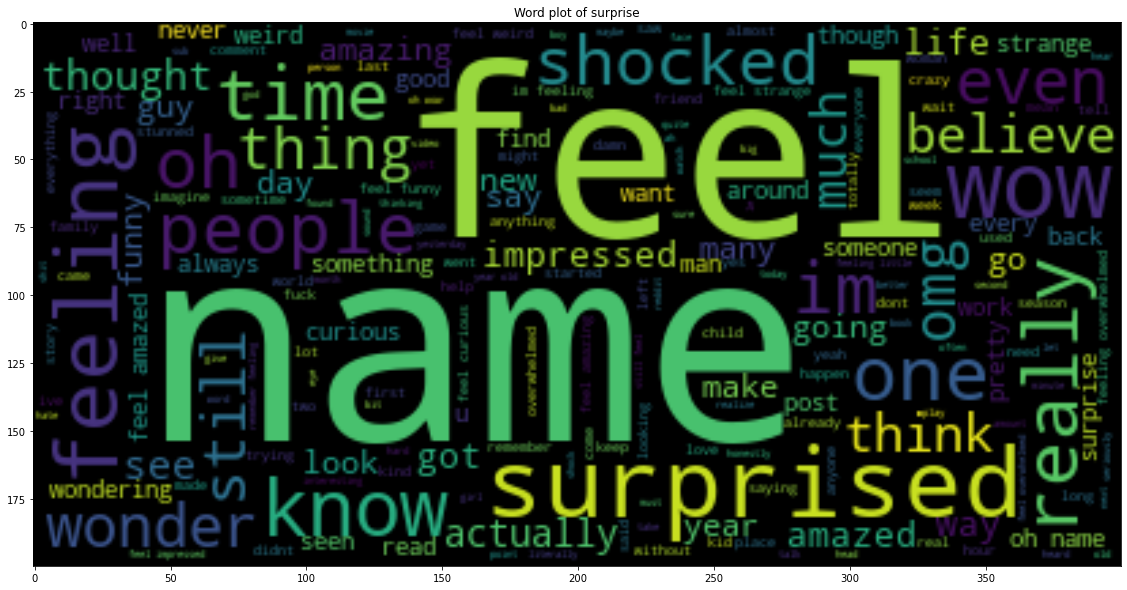

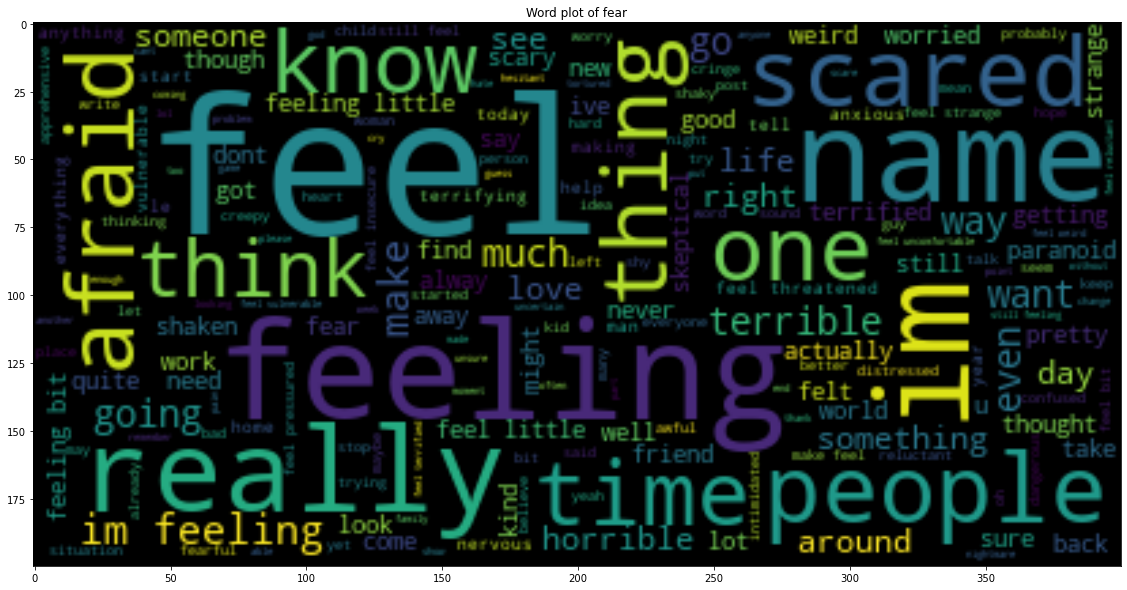

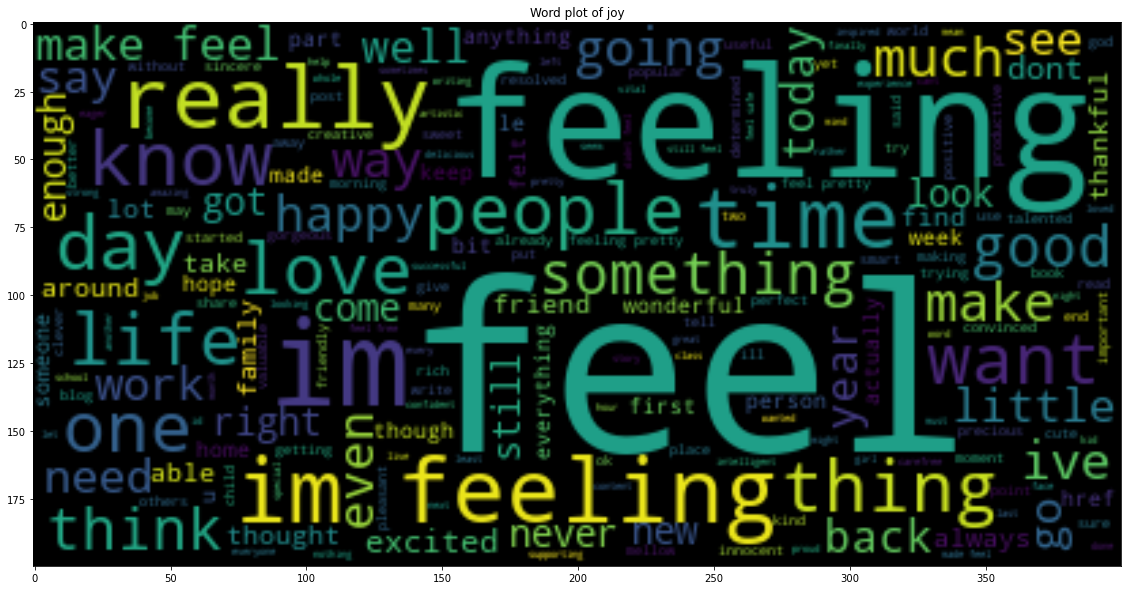

In [37]:
for i in dit.keys():
    plot_wordcloud(dit[i],i)
    

In [38]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

In [39]:
data.head()

Sentences   Labels  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                          clean_data  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy

In [40]:
X = data['clean_data']
y = data['Labels']

In [41]:
# np.set_printoptions(threshold=np.inf)

In [42]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
X.shape

(24992, 17512)

In [43]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [44]:
y

array([4, 4, 0, ..., 2, 2, 2])

In [45]:
list(le.classes_)

['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [47]:
X.shape

(24992, 17512)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=200)

In [49]:
X_train.shape

(18744, 17512)

In [50]:
X_test.shape

(6248, 17512)

In [51]:
y_train.shape

(18744,)

In [52]:
y_test.shape

(6248,)

In [53]:
# Xgboost model

In [54]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [55]:
# kf=  KFold(n_splits=5)
# xgbclf = xgb.XGBClassifier()

# # Hyperparametric tuning using grid search
# param_grid = [{"learning_rate": [0.10,0.20,0.30 ],
#  "max_depth": [ 4,6,8],
#  "gamma": [ 0.0,0.1,0.2],
#  "n_estimators:" : [ 90,100,110],
#  "booster":["dart","gbtree"]}]

# grid = GridSearchCV(estimator=xgbclf, param_grid=param_grid, scoring='accuracy', cv=kf)
# grid.fit(X_train, y_train)

# print('Estimator: ', grid.best_estimator_)
# print('Best params : ', grid.best_params_)
# print('Output Classes: ', grid.classes_)
# print('Training Accuracy: ', grid.best_score_)

In [56]:
# kf=  KFold(n_splits=5)
# xgbclf = xgb.XGBClassifier()

# # Hyperparametric tuning using grid search
# param_grid = {"learning_rate": [0.10,0.20,0.30],
#  "max_depth": [4,6,10],
#  "gamma": [0.0,0.1,0.2],
#  "n_estimators:" : [90,100,120]}

# grid = GridSearchCV(estimator=xgbclf, param_grid=param_grid, scoring='accuracy', cv=kf)
# grid.fit(X_train, y_train)

# print('Estimator: ', grid.best_estimator_)
# print('Best params : ', grid.best_params_)
# print('Output Classes: ', grid.classes_)
# print('Training Accuracy: ', grid.best_score_)

In [57]:
xgbclf = xgb.XGBClassifier(n_estimators=120)
xgbclf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [58]:
xgb_pred = xgbclf.predict(X_test)

In [59]:
xgb_accuracy = accuracy_score(xgb_pred ,y_test)
xgb_accuracy

0.8426696542893726

In [60]:
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1133
           1       0.87      0.70      0.77       948
           2       0.90      0.92      0.91      1460
           3       0.83      0.86      0.84       781
           4       0.95      0.92      0.93      1339
           5       0.79      0.63      0.70       587

    accuracy                           0.84      6248
   macro avg       0.84      0.82      0.82      6248
weighted avg       0.85      0.84      0.84      6248

[[ 997   25   29   31   27   24]
 [ 186  659   18   18   19   48]
 [  21   14 1342   61   16    6]
 [  41    4   48  670    4   14]
 [  31   20   40   13 1229    6]
 [ 158   33   11   15    2  368]]


C:\Users\Ritwick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


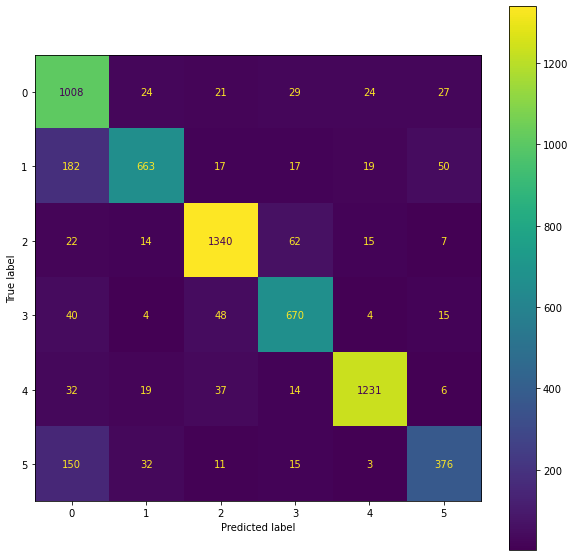

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(xgbclf,X_test,y_test,ax=ax)
plt.show()

In [93]:
test_data = pd.read_csv('test.csv')

In [94]:
test_data

Sentences   Labels
0     im feeling rather rotten so im not very ambiti...  sadness
1             im updating my blog because i feel shitty  sadness
2     i never make her separate from me because i do...  sadness
3     i left with my bouquet of red and yellow tulip...      joy
4       i was feeling a little vain when i did this one  sadness
...                                                 ...      ...
1995  i just keep feeling like someone is being unki...    anger
1996  im feeling a little cranky negative after this...    anger
1997  i feel that i am useful to my people and that ...      joy
1998  im feeling more comfortable with derby i feel ...      joy
1999  i feel all weird when i have to meet w people ...     fear

[2000 rows x 2 columns]

<AxesSubplot:xlabel='Labels', ylabel='count'>

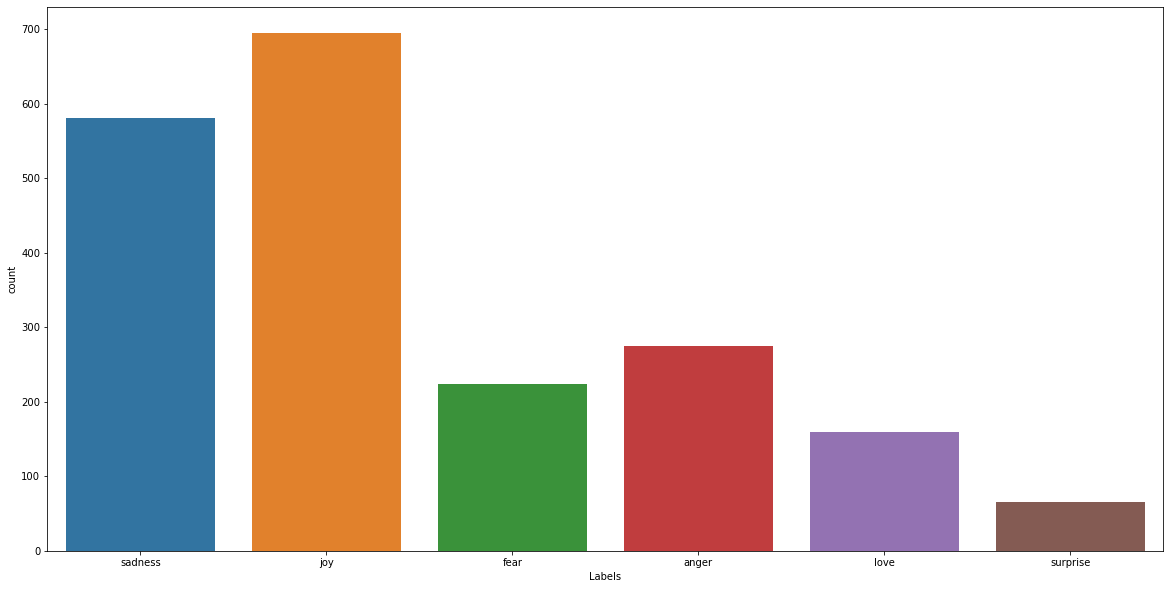

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x = test_data['Labels'])

In [96]:
test_sentences = test_data['Sentences']

In [97]:
x_test_count = cv.transform(test_sentences).toarray()

In [98]:
print(x_test_count.shape)

(2000, 17512)


In [99]:
x_test_pred = xgbclf.predict(x_test_count)

In [100]:
test_data['xgb_prediction'] = x_test_pred

In [101]:
test_data['xgb_prediction'] = test_data['xgb_prediction'].replace([0,1,2,3,4,5],['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'])

In [102]:
test_data

Sentences   Labels  \
0     im feeling rather rotten so im not very ambiti...  sadness   
1             im updating my blog because i feel shitty  sadness   
2     i never make her separate from me because i do...  sadness   
3     i left with my bouquet of red and yellow tulip...      joy   
4       i was feeling a little vain when i did this one  sadness   
...                                                 ...      ...   
1995  i just keep feeling like someone is being unki...    anger   
1996  im feeling a little cranky negative after this...    anger   
1997  i feel that i am useful to my people and that ...      joy   
1998  im feeling more comfortable with derby i feel ...      joy   
1999  i feel all weird when i have to meet w people ...     fear   

     xgb_prediction  
0           sadness  
1           sadness  
2           sadness  
3               joy  
4           sadness  
...             ...  
1995          anger  
1996          anger  
1997            joy  
1998            joy  
1999           fear  

[2000 rows x 3 columns]

In [103]:
xgb_test_accuracy = accuracy_score(test_data['Labels'], test_data['xgb_prediction'])
xgb_test_accuracy

0.883

In [104]:
print(classification_report(test_data['Labels'], test_data['xgb_prediction'] ))
print(confusion_matrix(test_data['Labels'], test_data['xgb_prediction']))

              precision    recall  f1-score   support

       anger       0.84      0.93      0.88       275
        fear       0.88      0.89      0.88       224
         joy       0.91      0.89      0.90       695
        love       0.73      0.79      0.76       159
     sadness       0.96      0.89      0.92       581
    surprise       0.63      0.71      0.67        66

    accuracy                           0.88      2000
   macro avg       0.82      0.85      0.84      2000
weighted avg       0.89      0.88      0.88      2000

[[257   6   2   2   7   1]
 [  3 199   1   2   8  11]
 [ 18   4 622  36   6   9]
 [  2   0  30 125   0   2]
 [ 26   4  23   7 516   5]
 [  0  13   6   0   0  47]]


In [58]:
import pickle

In [63]:
with open('model_pkl','wb') as f:
    pickle.dump(xgbclf,f)

In [87]:
import speech_recognition as sr

# Initialize recognizer class (for recognizing the speech)

r = sr.Recognizer()

audio_text = ''

with sr.Microphone() as source:
    print("Talk")
    audio_text = r.listen(source)
    print("Time over, thanks")
    
    try:
        
        text = r.recognize_google(audio_text)
        audio_text = text
        print("Text: ",text)
    except:
         print("Sorry, I did not get that")

Talk
Time over, thanks
result2:
{   'alternative': [   {   'confidence': 0.84339923,
                           'transcript': "I am very surprise that today's one "
                                         'bad thing happened me'},
                       {   'transcript': "why I am very surprise that today's "
                                         'one bad thing happened me'},
                       {   'transcript': "I am very surprise that today's one "
                                         'bad thing happened'},
                       {   'transcript': "why I am very surprise that today's "
                                         'one bad thing happened'},
                       {   'transcript': 'I am very surprise that today is one '
                                         'bad thing happened me'}],
    'final': True}
Text:  I am very surprise that today's one bad thing happened me


In [105]:
audio_text

"I am very surprise that today's one bad thing happened me"

In [67]:
txt = 'today i feel sad'

In [83]:
def emotion_detection(speech):
    with open('model_pkl' , 'rb') as f:
        xgboost_file = pickle.load(f)
    emotion_list = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
    count_v_text = cv.transform([speech]).toarray()
    text_pred = xgboost_file.predict(count_v_text)
    emotion_result = emotion_list[int(text_pred)]
    return emotion_result
    

In [84]:
emotion_detection(txt)

'sadness'

In [88]:
emotion_detection(audio_text)

'surprise'